# Кейс Т-Банк: поездки на самокатах

Автор: Купцова Алена

Дата 10/05/2025

## Описание кейса
Т-Город — это группа сервисов, которые помогают пользователям решать ежедневные
задачи. Например, есть сервисы, которые позволяют купить билеты в кино или заказать
продукты и так далее. В частности, существует сервис для аренды электросамокатов
«Самокаты» — именно ему посвящена данная база.

Сервис позволяет воспользоваться самокатом от Юрента через приложение Т-Банка.
Чтобы арендовать самокат, клиенту необходимо зайти в приложение, открыть сервис
«Самокаты» и отсканировать QR-код на руле самоката. В этот момент у клиента
со счета списывается фиксированная сумма в качестве взноса. В конце поездки
также списывается итоговая сумма за поездку.

- Данные охватывают сезон аренды самокатов 2024 года (с апреля по октябрь 2024).

- Стоимость минуты и стоимость поездки измеряется в условных денежных единицах

## Цель проекта

- На основе предоставленных данных необходимо их проанализировать и выявить ценную гипотезу для данного сервиса

## Задачи проекта

- Провести разведочный анализ данных
- Сформулировать 2-3 продуктовые гипотезы на основе проведенного EDA, которые можно было бы проверить на данных из датасета 
- Выберать одну из гипотез и объяснить, почему она является самой перспективной 
- Определить долю сервиса Т-Банка в индустрии (области), к которой относится датасет


# Описание данных

Таблица по аренде самокатов 2024 года (с апреля 2024 по октябрь 2024) `kicksharing.csv`

- `order_rk` — Идентификатор заказа (поездки)

- `party_rk_id` — Идентификатор клиента

- `minute_cost` —  Стоимость минуты

- `hold_amount` — Размер суммы, которая замораживается на счете в момент взятия самоката

- `transport_model` — Название модели самоката

- `activation_cost`- стоимость активации поездки

- `distance_km` — Километраж поездки

- `created_dttm` — Дата и время создания заказа

- `book_start_dttm` — Дата и время начала поездки

- `book_end_dttm` — Дата и время завершения поездки

- `book_time_zone_cd` — Часовой пояс

- `local_book_start_dttm` — Дата и время начала поездки в часовом поясе человека, который брал самокат

- `nominal_price_rub_amt` — Стоимость поездки

- `loyalty_accrual_rub_amt` — Размер выплаченного кэшбэка в рублях

- `loyalty_accrual_bns_amt` — Размер выплаченного кэшбэка в бонусах (если оплата происходила с помощью кредитной карты)

- `Gender_cd` — Пол клиента

- `Age` — Возраст клиента

- `Education_level` — Уровень образования клиента: `SCH — начальное, среднее` `GRD — высшее`, `UGR — неполное высшее`, `PGR — два высших`, `ACD — ученая степень`

- `lvn_state_nm` — Регион проживания человека

- `marital_status_cd` — Семейный статус человека: `IMR — состоит в незарегистрированном браке`, `MAR —женат/замужем`, `DLW — не проживает с супругом(ой)`, `OMR — состоит в зарегистрированном браке`, `CIV — гражданский брак`, `UNM — холост/не замужем`, `DIV — разведен(а)`, `FAL — никогда не состоял(а) в браке`, `WID — вдовец/вдова`


# Разведочный анализ данных EDA

## 1.  Общая структура данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
# Cчитаем и сохраним в отдельный датафрейм CSV-файл
df = pd.read_csv('https://dano.hse.ru/mirror/pubs/share/987942268.csv')
# выведем первые 5 строк датасета
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


In [3]:
#выведем информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [4]:
# выведем статистики по количественным столбцам 
df.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,book_time_zone_cd,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.967490e+05,3.967490e+05,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,366992.000000,21948.000000
mean,2.892236e+08,5.988426e+08,31.544006,7.288688,42.593226,299.983869,3.681031,3.536155,127.647694,37.516121,127.789319
std,3.813458e+07,3.311675e+08,9.434545,1.289492,11.989974,1.939153,141.862349,1.209075,100.122365,75.208560,496.812143
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,0.000000,0.000000,-161.940000,1.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.941054,3.000000,80.840000,11.240000,43.000000
50%,2.704367e+08,6.110092e+08,31.000000,7.490000,50.000000,300.000000,1.729883,3.000000,103.940000,18.730000,62.000000
75%,3.432678e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.063694,3.000000,142.100000,35.060000,81.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,56012.640308,12.000000,5627.640000,3185.000000,55429.360970


- Всего в датасете 20 столбцов и 396 749 строк. 
- Наличие пропусков в 6 столбцах
- В некоторых столбцах содержатся аномальные значения(`distance_km`)

In [5]:
# приведем некоторые столбцы к нужному типу данных, 
# а также понизм разряды в некоторых столбцах
df['order_rk'] = pd.to_numeric(df['order_rk'],downcast= 'integer')
df['party_rk']= pd.to_numeric(df['party_rk'],downcast= 'integer')
df['age']= pd.to_numeric(df['age'],downcast= 'integer')
df['book_time_zone_cd'] = pd.to_numeric(df['book_time_zone_cd'],downcast= 'integer')

df['minute_cost']= pd.to_numeric(df['minute_cost'],downcast= 'float')
df['activation_cost']= pd.to_numeric(df['activation_cost'],downcast= 'float')
df['hold_amount']= pd.to_numeric(df['hold_amount'],downcast= 'float')
df['distance_km']= pd.to_numeric(df['distance_km'],downcast= 'float')
df['nominal_price_rub_amt']= pd.to_numeric(df['nominal_price_rub_amt'],downcast= 'float')
df['loyalty_accrual_rub_amt']= pd.to_numeric(df['loyalty_accrual_rub_amt'],downcast= 'float')
df['loyalty_accrual_bns_amt']= pd.to_numeric(df['loyalty_accrual_bns_amt'],downcast= 'float')

df['created_dttm'] = pd.to_datetime(df['created_dttm'])
df['book_start_dttm']= pd.to_datetime(df['book_start_dttm'])
df['book_end_dttm']= pd.to_datetime(df['book_end_dttm'])
df['local_book_start_dttm']= pd.to_datetime(df['local_book_start_dttm'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 396749 non-null  int32         
 1   party_rk                 396749 non-null  int32         
 2   gender_cd                393828 non-null  object        
 3   age                      396749 non-null  int8          
 4   education_level_cd       190059 non-null  object        
 5   marital_status_cd        217729 non-null  object        
 6   lvn_state_nm             362572 non-null  object        
 7   minute_cost              396749 non-null  float32       
 8   activation_cost          396749 non-null  float32       
 9   hold_amount              396749 non-null  float32       
 10  transport_model          396749 non-null  object        
 11  distance_km              396749 non-null  float32       
 12  created_dttm    

In [7]:
# Поиск дубликатов и пропусков
count_null = df.isna().sum().sum()
dupl_count = df.duplicated().sum().sum()
print(count_null, dupl_count)

827366 0


In [8]:
df.isna().sum()

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

В ходе поиска было обнаружено 0 дубликатов и 827 366 пропусков в 6 столбцах:

1. `gender_cd`
2.  `education_level_cd`
3.  `marital_status_cd`
4.  `lvn_state_nm`
5. `loyalty_accrual_rub_amt`
6. `loyalty_accrual_bns_amt`

В данных присутствуют пропуски в столбцах, связанных с демографией,гендером,уровнем образования, семейного статуса и кэшбэком, что может быть связано с неполным заполнением анкет пользователей или отсутствием кэшбэка в некоторых поездках.

In [9]:
# проверим до того, как поставим заглушку в виде 0,что таких значений нет
display(df[df['loyalty_accrual_rub_amt']==0])
display(df[df['loyalty_accrual_bns_amt']==0])

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt


,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt


In [10]:
# Заполнение пропусков для типа object - 'No info', для типа float/int- 0
df['gender_cd'] = df['gender_cd'].fillna('No info')
df['education_level_cd'] = df['education_level_cd'].fillna('No info')
df['marital_status_cd'] = df['marital_status_cd'].fillna('No info')
df['lvn_state_nm'] = df['lvn_state_nm'].fillna('No info')

df['loyalty_accrual_rub_amt'] = df['loyalty_accrual_rub_amt'].fillna(0)
df['loyalty_accrual_bns_amt'] = df['loyalty_accrual_bns_amt'].fillna(0)

In [11]:
df.isna().sum().sum()

0

- Данные представлены корректно: 396 749 строк, 20 столбцов
- пропуски заполнены "заглушками"
- Дубликаты отсутствуют
- Все столбцы имеют оптимальные типы данных

## 2. Демография пользователей

,gender_cd,party_rk,share_gender
1,M,51399,0.80
0,F,12163,0.19
2,No info,490,0.01


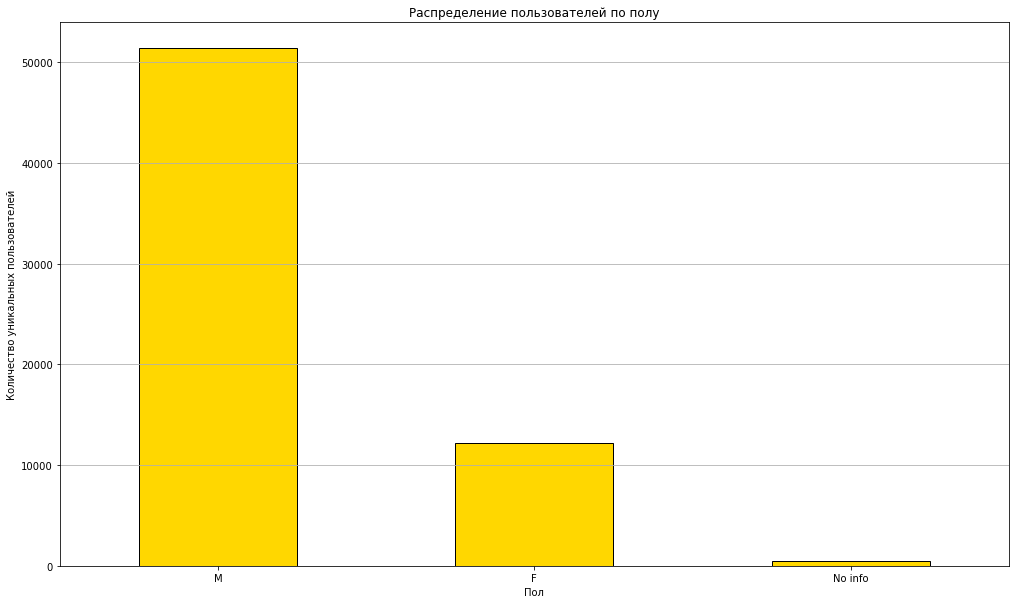

In [12]:
# распределение по полу- диаграмма
gender_count = df.groupby(df['gender_cd'], as_index= False)['party_rk'].nunique()
gender_count= gender_count.sort_values(by='party_rk', ascending=False)
gender_count['share_gender']= (gender_count['party_rk']/ gender_count['party_rk'].sum()).round(2)
display(gender_count)

gender_count.plot(kind='bar',x='gender_cd', y='party_rk', figsize=(17, 10), color='gold', edgecolor='black',legend= False)
plt.title('Распределение пользователей по полу')
plt.ylabel('Количество уникальных пользователей')
plt.xlabel('Пол')
plt.xticks(rotation=360)
plt.grid(axis='y')
plt.show()

count    396749.000000
mean         31.544006
std           9.434545
min          12.000000
25%          24.000000
50%          31.000000
75%          37.000000
max          94.000000
Name: age, dtype: float64

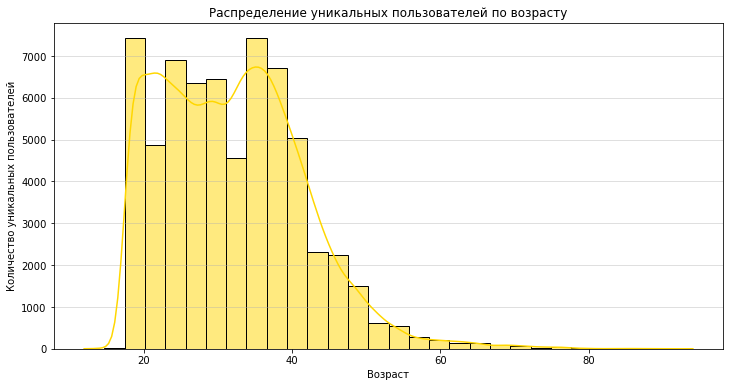

In [13]:
# распределение по возрасту
display(df['age'].describe())
# kde- это график ядерной оценки плотности; позволяет оценить функцию плотности вероятности непрерывной или непараметрической кривой из набора данных в одном или нескольких измерениях. 
age_unique_users= df.drop_duplicates(subset='party_rk', keep= 'first')
plt.figure(figsize=(12,6))
sns.histplot(age_unique_users['age'], color='gold', bins=30, edgecolor='black', kde= True)
plt.title('Распределение уникальных пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество уникальных пользователей')
plt.grid(axis='y', alpha=0.5)
plt.show()

,age_group,party_rk
3,36-45,17447
0,19-25,16573
2,31-35,11549
1,26-30,10750
4,45+,5074
5,до 18,2659


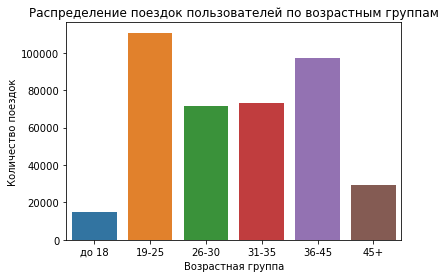

  age_group  nominal_price_rub_amt
0     19-25             120.427216
1     26-30             125.911018
2     31-35             128.706085
3     36-45             134.879135
4       45+             135.333206
5     до 18             122.236595


In [14]:
# Дополнительно: сегментирование пользователей по возрастным группам (моложе 25, 25–35, 35+)
# Категоризация возраста
def age_segment(age):
    if age <=18:
        return 'до 18'
    elif  age<=25:
        return '19-25'
    elif age <=30:
        return '26-30'
    elif age <=35:
        return '31-35'
    elif age <=45:
        return '36-45'
    else:
        return '45+'
df['age_group']= df['age'].apply(age_segment)

#количество пользователей по возрастным группам
users_by_age_group= df.groupby('age_group',as_index=False)['party_rk'].nunique().sort_values(by= 'party_rk',ascending=False)
display(users_by_age_group)


sns.countplot(x='age_group', data=df, order=['до 18','19-25','26-30','31-35','36-45','45+'])
plt.title('Распределение поездок пользователей по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество поездок')
plt.show()


# Группируем по возрастной группе и считаем среднюю стоимость поездки
age_group_avg_price = df.groupby('age_group')['nominal_price_rub_amt'].mean().reset_index()
print(age_group_avg_price)

,education_level_cd,party_rk,share_edu
2,No info,33848,0.53
1,GRD,15269,0.24
4,SCH,8207,0.13
5,UGR,5764,0.09
3,PGR,733,0.01
0,ACD,231,0.00


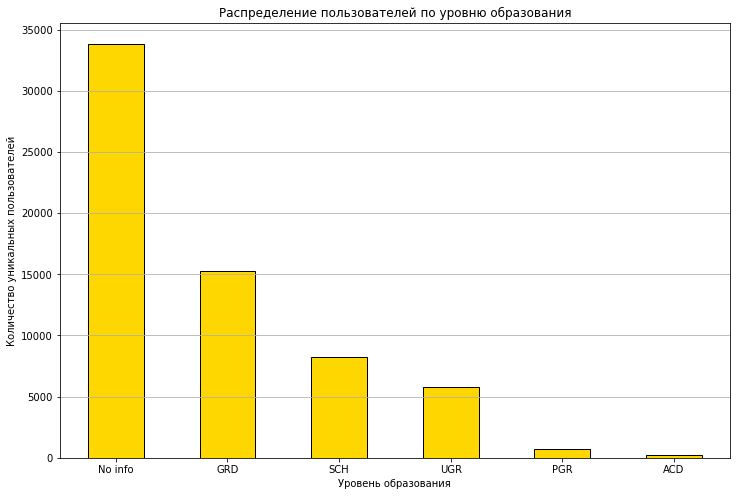

In [15]:
# рапсределение по образованию
edu_count = df.groupby(df['education_level_cd'],as_index=False)['party_rk'].nunique()
edu_count= edu_count.sort_values(by='party_rk', ascending=False)
edu_count['share_edu']= (edu_count['party_rk']/edu_count['party_rk'].sum()).round(2)
display(edu_count)

edu_count.plot(kind='bar', x='education_level_cd',y='party_rk', legend= False,color='gold',edgecolor='black',figsize=(12,8))
plt.title('Распределение пользователей по уровню образования')
plt.ylabel('Количество уникальных пользователей')
plt.xlabel('Уровень образования')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

,marital_status_cd,party_rk,share_marital
3,No info,29581,0.46
4,UNM,16631,0.26
2,MAR,13266,0.21
0,CIV,2595,0.04
1,DIV,1850,0.03
5,WID,129,0.00


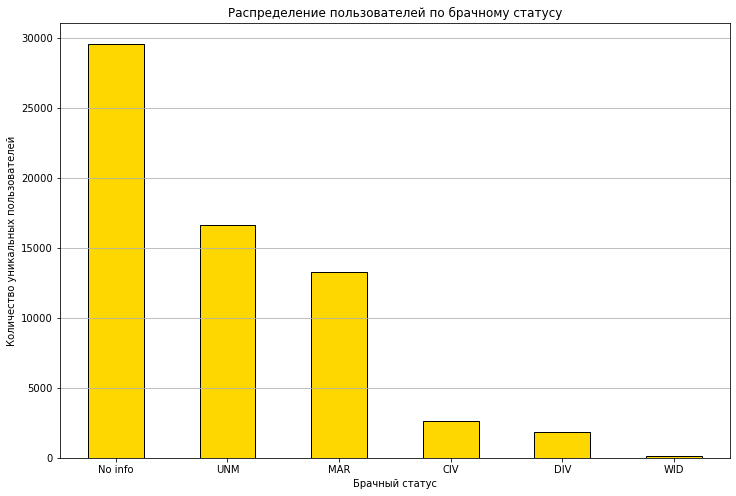

In [16]:
# рапсределение по брачному статусу
marital_count = df.groupby(df['marital_status_cd'],as_index=False)['party_rk'].nunique()
marital_count= marital_count.sort_values(by='party_rk', ascending=False)
marital_count['share_marital']= (marital_count['party_rk']/marital_count['party_rk'].sum()).round(2)
display(marital_count)

marital_count.plot(kind='bar', x='marital_status_cd',y='party_rk', legend= False,color='gold',edgecolor='black',figsize=(12,8))
plt.title('Распределение пользователей по брачному статусу')
plt.ylabel('Количество уникальных пользователей')
plt.xlabel('Брачный статус')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Пользователи сервиса — преимущественно мужчины в возрасте 19–35 лет. Образование и семейный статус часто не указаны, вероятно, не обязательны в профиле.

,lvn_state_nm,party_rk,share_region
20,Г МОСКВА,11708,0.18
1,No info,6205,0.10
71,МОСКОВСКАЯ ОБЛ,6044,0.09
22,Г САНКТ-ПЕТЕРБУРГ,5490,0.09
182,СВЕРДЛОВСКАЯ ОБЛ,3275,0.05
54,КРАСНОДАРСКИЙ КРАЙ,2233,0.03
161,РЕСП ТАТАРСТАН,1813,0.03
145,РЕСП БАШКОРТОСТАН,1582,0.02
77,НИЖЕГОРОДСКАЯ ОБЛ,1495,0.02
81,НОВОСИБИРСКАЯ ОБЛ,1148,0.02


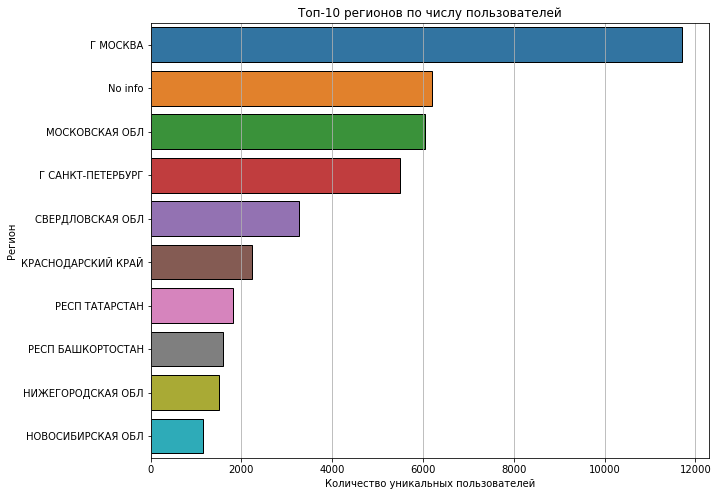

In [17]:
# топ-10 регионов по числу пользователей-диагрмма barplot
top_10_regions = df.groupby(df['lvn_state_nm'],as_index=False)['party_rk'].nunique()
top_10_regions= top_10_regions.sort_values(by='party_rk', ascending= False)
top_10_regions['share_region']=(top_10_regions['party_rk']/top_10_regions['party_rk'].sum()).round(2)
top_10_regions = top_10_regions.iloc[:10]
display(top_10_regions)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='party_rk', 
    y='lvn_state_nm', 
    data=top_10_regions,
    orient='h',edgecolor='black')
plt.title('Топ-10 регионов по числу пользователей')
plt.ylabel('Регион')
plt.xlabel('Количество уникальных пользователей')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.show()

## Стоимость поездок

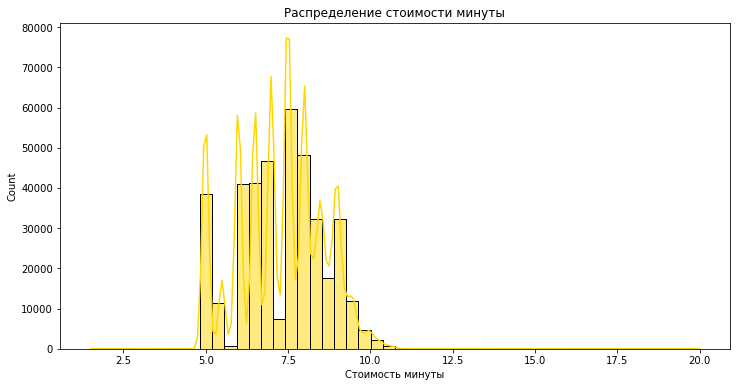

count    396749.000000
mean          7.294852
std           1.288830
min           1.500000
25%           6.490000
50%           7.490000
75%           8.220000
max          19.990000
Name: minute_cost, dtype: float64

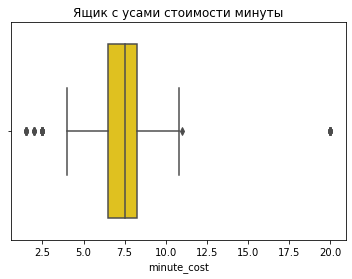

In [18]:
# распределение цен за минуту
# Стоимость минуты в сервисе «Юрент» зависит от города, времени суток, 
#дня недели, востребованности самоката и его уровня заряда.

plt.figure(figsize=(12,6))
sns.histplot(df['minute_cost'],bins=50, kde=True,color='gold',edgecolor='black')
plt.title('Распределение стоимости минуты')
plt.xlabel('Стоимость минуты')
plt.show()

display(df['minute_cost'].describe())

sns.boxplot(x=df['minute_cost'],color='gold')
plt.title('Ящик с усами стоимости минуты')
plt.show()

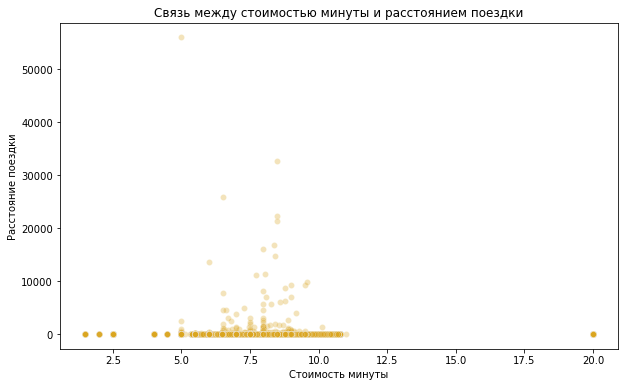

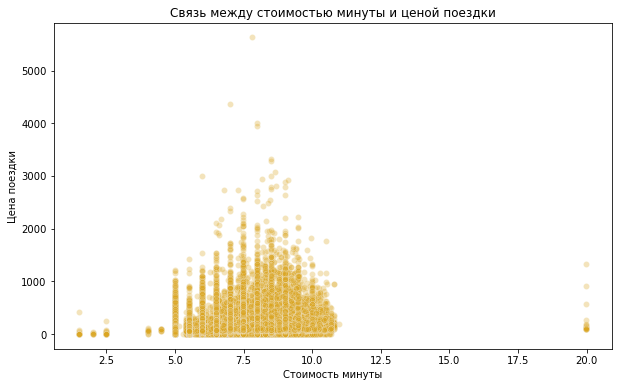

In [19]:
# связь между стоимостью минуты с расстоянием,ценой и временем 
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['minute_cost'],y=df['distance_km'], alpha=0.3,color='goldenrod')
plt.title('Связь между стоимостью минуты и расстоянием поездки')
plt.xlabel('Стоимость минуты')
plt.ylabel('Расстояние поездки')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='minute_cost', y='nominal_price_rub_amt', data=df, alpha=0.3,color='goldenrod')
plt.title('Связь между стоимостью минуты и ценой поездки')
plt.xlabel('Стоимость минуты')
plt.ylabel('Цена поездки')
plt.show()

In [20]:
# извлечем месяц день недели и час
df['month'] = df['local_book_start_dttm'].dt.month
df['weekday'] = df['local_book_start_dttm'].dt.day_name()
df['hour'] = df['local_book_start_dttm'].dt.hour
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,age_group,month,weekday,hour
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.789993,19.480000,0.0,36-45,8,Wednesday,11
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,...,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.430000,40.299999,0.0,26-30,10,Thursday,14
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.930000,10.790000,0.0,26-30,9,Thursday,7
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,...,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.970001,7.700000,0.0,19-25,10,Friday,16
4,258647149,238473615,M,34,No info,No info,Г МОСКВА,6.99,50.0,300.0,...,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.889999,25.379999,0.0,31-35,7,Wednesday,6


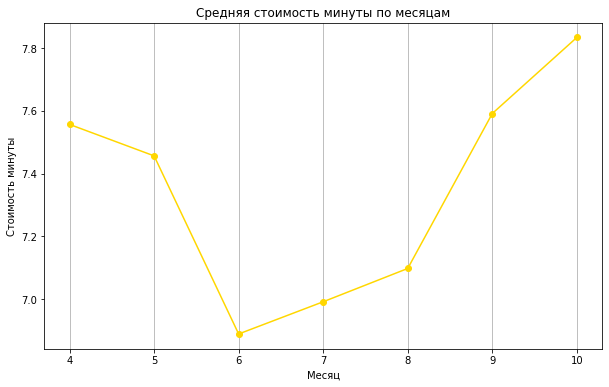

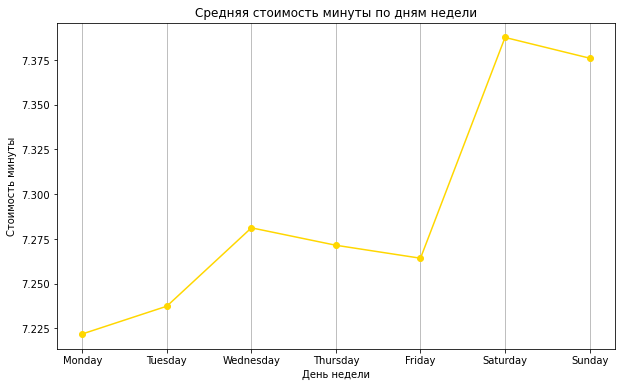

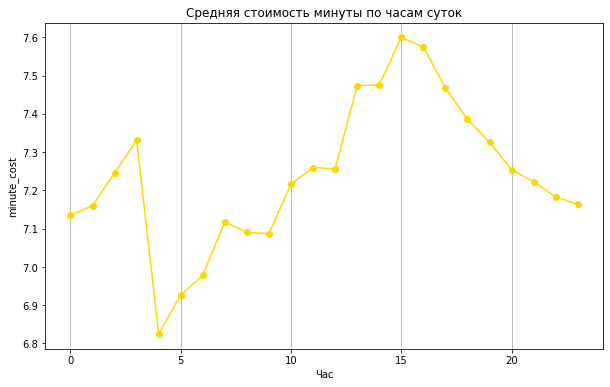

In [21]:
# Средняя стоимость минуты по месяцам
month_cost = df.groupby('month')['minute_cost'].mean().reset_index()
month_cost.plot(kind='line', x='month',y='minute_cost',legend=False, marker='o', figsize=(10,6), color='gold')
plt.title('Средняя стоимость минуты по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Стоимость минуты')
plt.grid(axis='x')
plt.show()

# По дням недели
weekday_cost = df.groupby('weekday')['minute_cost'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()
weekday_cost.plot(kind='line', x='weekday',y='minute_cost',legend=False, marker='o', figsize=(10,6), color='gold')
plt.title('Средняя стоимость минуты по дням недели')
plt.xlabel('День недели')
plt.ylabel('Стоимость минуты')
plt.grid(axis='x')
plt.show()

# По часам суток
hour_cost = df.groupby('hour')['minute_cost'].mean().reset_index()
hour_cost.plot(kind='line', x='hour',y='minute_cost',legend=False, marker='o', figsize=(10,6), color='gold')
plt.title('Средняя стоимость минуты по часам суток')
plt.xlabel('Час')
plt.ylabel('minute_cost')
plt.grid(axis='x')
plt.show()

Уникальные значения activation_cost: [0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 35.0, 40.0, 45.0, 50.0]
Уникальные значения hold_amount: [80.0, 300.0, 500.0]


'Частота взимаемой замороженной суммы перед поездкой:'

300.0    396718
80.0         30
500.0         1
Name: hold_amount, dtype: int64

,index,activation_cost
0,0.0,3.795851
1,5.0,0.003025
2,10.0,0.001260
3,15.0,0.027221
4,20.0,0.178450
5,30.0,22.449710
6,35.0,3.280412
7,40.0,4.425720
8,45.0,0.386894
9,50.0,65.451457


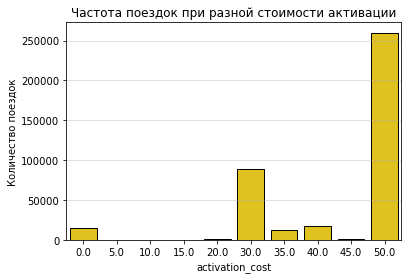

,hour,activation_cost
0,0,41.819714
1,1,42.151287
2,2,43.431702
3,3,44.075638
4,4,43.319881
5,5,43.304214
6,6,43.437149
7,7,40.399658
8,8,40.409462
9,9,40.042381


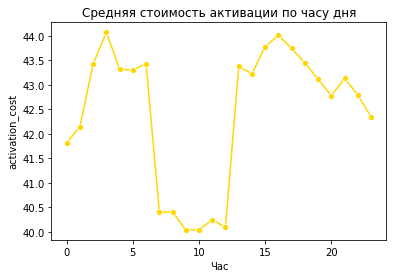

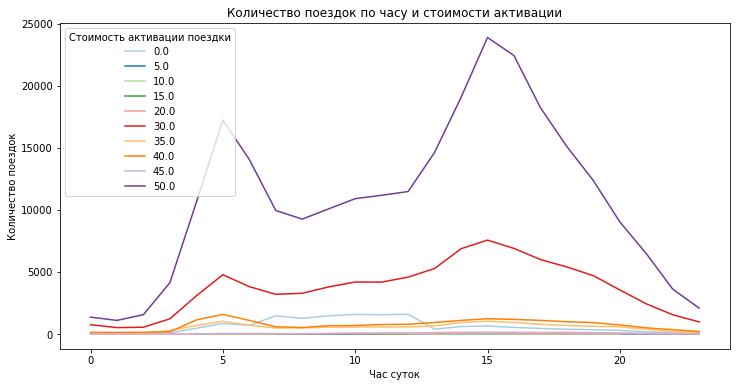

In [22]:
# Уникальные значения
print('Уникальные значения activation_cost:', sorted(df['activation_cost'].unique()))
print('Уникальные значения hold_amount:', sorted(df['hold_amount'].unique()))

#частота взимаемой замороженной суммы перед поездкой
count_hold_amount= df['hold_amount'].value_counts().sort_values(ascending=False)
display(f'Частота взимаемой замороженной суммы перед поездкой:')
display(count_hold_amount)

# количество поездок для каждой стоимости активации
activation_counts = df['activation_cost'].value_counts().sort_index()


activation_counts_share = df['activation_cost'].value_counts(normalize=True).sort_index() * 100  # Доли в процентах
activation_counts_share = activation_counts_share.reset_index()
display(activation_counts_share)

sns.barplot(x=activation_counts.index, y=activation_counts.values,color='gold',edgecolor='black')
plt.title('Частота поездок при разной стоимости активации')
plt.xlabel('activation_cost')
plt.ylabel('Количество поездок')
plt.grid(axis='y',alpha=0.5)
plt.show()


# Средняя стоимость активации и замороженной суммы по часам суток
hourly_activation = df.groupby('hour')['activation_cost'].mean().reset_index()
display(hourly_activation)
sns.lineplot(x='hour', y='activation_cost', data=hourly_activation,color='gold', marker='o')
plt.title('Средняя стоимость активации по часу дня')
plt.xlabel('Час')
plt.ylabel('activation_cost')
plt.show()

# Группировка: сколько поездок в каждом часу при каждой стоимости
hour_act = df.groupby(['hour', 'activation_cost'])['order_rk'].count().reset_index()
hour_act.columns = ['hour', 'activation_cost', 'ride_count']

plt.figure(figsize=(12,6))
sns.lineplot(data=hour_act, x='hour', y='ride_count', hue='activation_cost', palette='Paired')
plt.title('Количество поездок по часу и стоимости активации')
plt.xlabel('Час суток')
plt.ylabel('Количество поездок')
plt.legend(title='Стоимость активации поездки')
plt.show()


## 4. Модели самокатов

,transport_model,order_rk,models_share
11,SL,241247,0.61
10,Max,70301,0.18
1,E,67666,0.17
13,Urban E-Bike,4704,0.01
6,ES400,4152,0.01
5,ES200,3325,0.01
4,ES100,2829,0.01
9,MK,1054,0.00
3,ES-08S,911,0.00
12,Techno,228,0.00


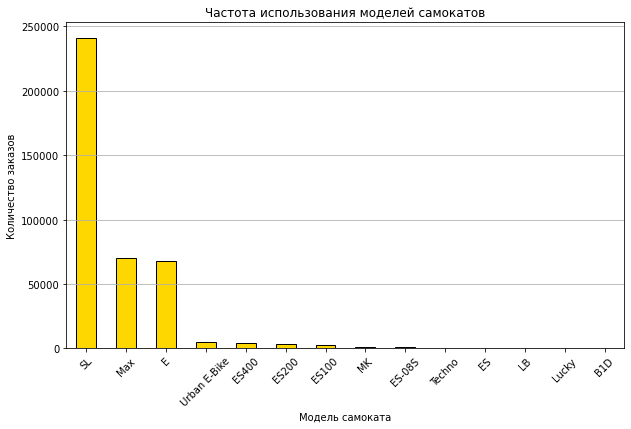

In [23]:
# Частота использования моделей 
models_count = df.groupby('transport_model')['order_rk'].count().reset_index()
models_count= models_count.sort_values(by= 'order_rk',ascending=False)
models_count['models_share']= round(models_count['order_rk']/ models_count['order_rk'].sum(),2)
display(models_count)

models_count.plot(kind='bar', x='transport_model',y='order_rk', legend= False,color='gold',edgecolor='black',figsize=(10,6))
plt.title('Частота использования моделей самокатов')
plt.xlabel('Модель самоката')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

   transport_model  duration_min  nominal_price_rub_amt
0              B1D     17.861111             205.500549
1                E     11.150031             108.441498
2               ES     18.731092             171.506897
3           ES-08S     17.068057             181.915176
4            ES100     15.541534             151.471725
5            ES200     13.255038             142.267197
6            ES400     14.335983             140.087357
7               LB     12.286957             123.651825
8            Lucky     12.225806              37.040321
9               MK     15.472486             149.327133
10             Max     12.746974             130.676483
11              SL     10.991958             131.161118
12          Techno     12.442982             138.532990
13    Urban E-Bike     10.663478             126.521721


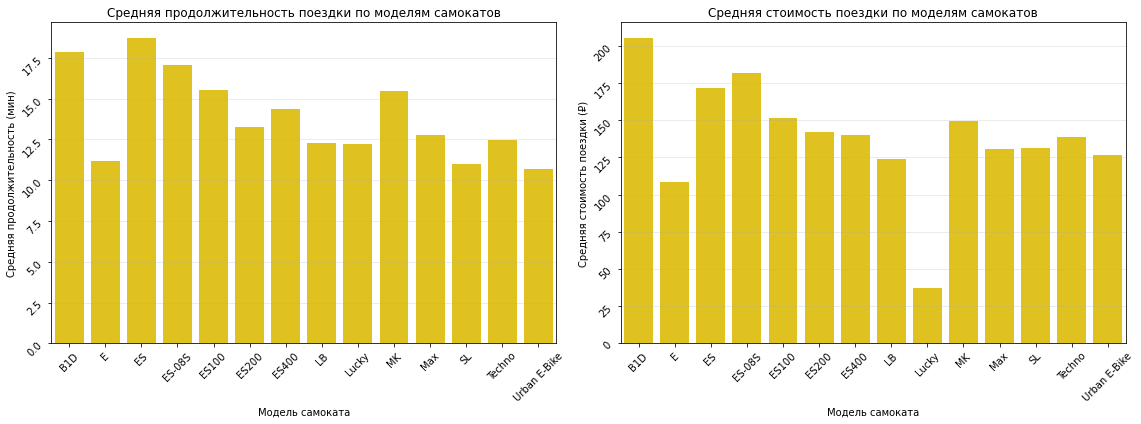

In [24]:

# Вычисляем продолжительность поездки в минутах
df['duration_min'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60
df['duration_min'] = df['duration_min'].round().astype(int)  # Округляем до целого числа минут

# Группировка по моделям самокатов, вычисляем среднюю продолжительность и цену
model_avg_price_duration = df.groupby('transport_model')[['duration_min', 'nominal_price_rub_amt']].mean().reset_index()
print(model_avg_price_duration)
# Визуализация средней продолжительности поездки  и средней цены по моделям самокатов
fig,ax= plt.subplots(1,2,figsize=(16,6))
# График средней продолжительности по моделям
sns.barplot(x='transport_model', y='duration_min', data=model_avg_price_duration,ax=ax[0],color='gold')
ax[0].set_title('Средняя продолжительность поездки по моделям самокатов')
ax[0].set_xlabel('Модель самоката')
ax[0].set_ylabel('Средняя продолжительность (мин)')
ax[0].grid(axis='y', alpha=0.3)  
ax[0].tick_params(rotation=45)

# График средней стоимости по моделям
sns.barplot(x='transport_model', y='nominal_price_rub_amt', data=model_avg_price_duration, ax=ax[1],color='gold')
ax[1].set_title('Средняя стоимость поездки по моделям самокатов')
ax[1].set_xlabel('Модель самоката')
ax[1].set_ylabel('Средняя стоимость поездки (₽)')
ax[1].grid(axis='y', alpha=0.3)  
ax[1].tick_params(rotation=45)
plt.tight_layout()
plt.show()


## 5. Временные характеристики


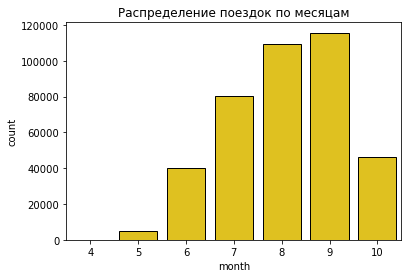

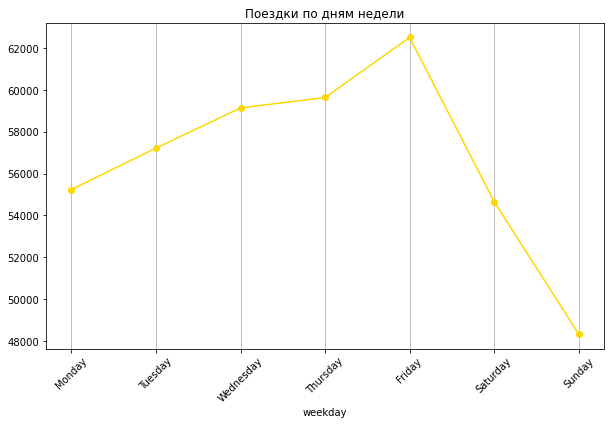

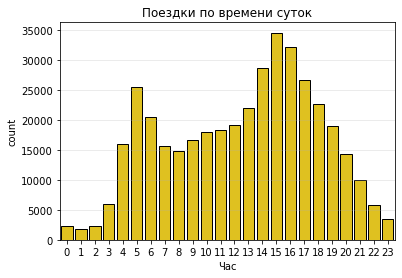

In [25]:
# Кол-во поездок по часам, дням недели, месяцам 
# Поездки по месяцам
sns.countplot(x='month', data=df,edgecolor='black',color='gold')
plt.title('Распределение поездок по месяцам')
plt.show()

# По дням недели
weekday_count = df.groupby('weekday')['order_rk'].count().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()
weekday_count.plot(kind='line', x='weekday',y='order_rk',legend=False, marker='o', figsize=(10,6), color='gold')
plt.title('Поездки по дням недели')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

# По часам
sns.countplot(x='hour', data=df,edgecolor='black',color='gold')
plt.title('Поездки по времени суток')
plt.xlabel('Час')
plt.grid(axis='y',alpha=0.3)
plt.show()

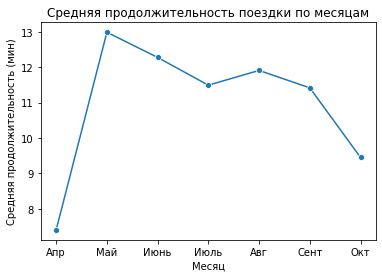

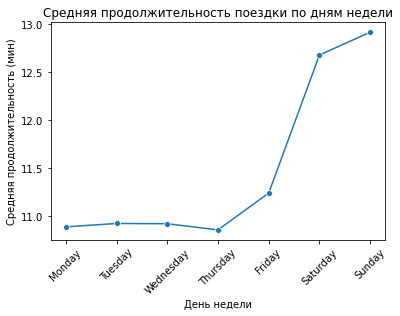

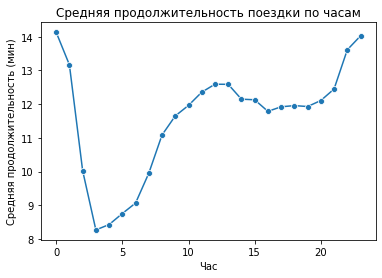

In [26]:
#  Средняя продолжительность по дням/месяцам  и часам- Анализ сезонности 
# Группировка по месяцам, вычисляем среднюю продолжительность поездки
monthly_duration = df.groupby('month')['duration_min'].mean().reset_index()

# Визуализация средней продолжительности по месяцам
sns.lineplot(x='month', y='duration_min', data=monthly_duration, marker='o')
plt.title('Средняя продолжительность поездки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя продолжительность (мин)')
plt.xticks(ticks=range(4, 11), labels=['Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сент', 'Окт'])
plt.show()

# Группировка по дням недели, вычисляем среднюю продолжительность поездки
weekday_duration = df.groupby('weekday')['duration_min'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Визуализация средней продолжительности по дням недели
sns.lineplot(x='weekday', y='duration_min', data=weekday_duration, marker='o')
plt.title('Средняя продолжительность поездки по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя продолжительность (мин)')
plt.xticks(rotation=45)
plt.show()


hour_duration = df.groupby('hour')['duration_min'].mean().reset_index()

# Визуализация средней продолжительности по месяцам
sns.lineplot(x='hour', y='duration_min', data=hour_duration, marker='o')
plt.title('Средняя продолжительность поездки по часам')
plt.xlabel('Час')
plt.ylabel('Средняя продолжительность (мин)')
plt.show()


## 6.Продолжительность и расстояние


In [27]:
# Распределение расстояний и продолжительности
print('Статистики столбца расстояния:')
print(df['distance_km'].describe())
print('Статистики столбца продолжительности:')
print(df['duration_min'].describe())

count_min_duration= df.groupby('duration_min',as_index=False)['order_rk'].count().sort_values(by='duration_min')
print('Количество поездок по продолжительности поездок:')
display(count_min_duration)

count_min_distance= df.groupby('distance_km',as_index=False)['order_rk'].count().sort_values(by='distance_km')
print('Количество поездок по расстоянию поездок:')
display(count_min_distance)

Статистики столбца расстояния:
count    396749.000000
mean          3.680861
std         141.839691
min           0.000000
25%           0.941054
50%           1.729883
75%           3.063694
max       56012.640625
Name: distance_km, dtype: float64
Статистики столбца продолжительности:
count    396749.000000
mean         11.442602
std          13.175852
min           0.000000
25%           5.000000
50%           8.000000
75%          13.000000
max         715.000000
Name: duration_min, dtype: float64
Количество поездок по продолжительности поездок:


,duration_min,order_rk
0,0,2107
1,1,12080
2,2,14783
3,3,25891
4,4,34532
...,...,...
265,487,1
266,494,1
267,497,1
268,617,1


Количество поездок по расстоянию поездок:


,distance_km,order_rk
0,0.000000e+00,12355
1,1.624713e-07,1
2,1.045083e-06,1
3,2.750634e-06,1
4,1.276987e-05,1
...,...,...
382377,2.140284e+04,1
382378,2.231778e+04,1
382379,2.583435e+04,1
382380,3.274277e+04,1


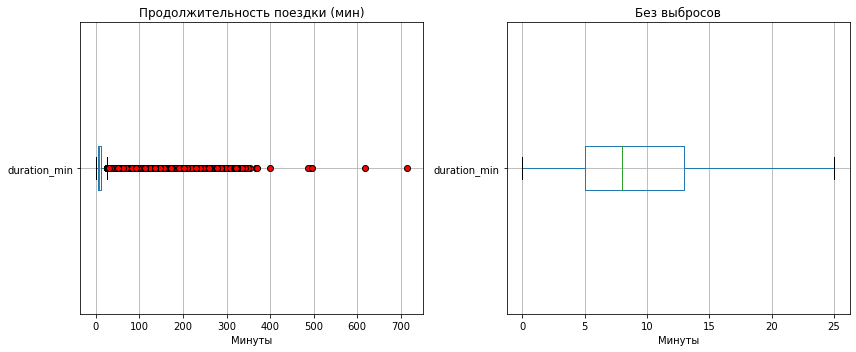

In [28]:
# ящик с усами по продолжительности поездки
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца графиков

#  продолжительность поездки (с выбросами)
df.boxplot(column='duration_min', vert=False, 
           flierprops=dict(markerfacecolor='red', marker='o'), 
           ax=ax[0])
ax[0].set_title('Продолжительность поездки (мин)')
ax[0].set_xlabel('Минуты')

#  продолжительность поездки (без выбросов)
df.boxplot(column='duration_min', vert=False, showfliers=False, ax=ax[1])
ax[1].set_title('Без выбросов')
ax[1].set_xlabel('Минуты')

plt.tight_layout()
plt.show()

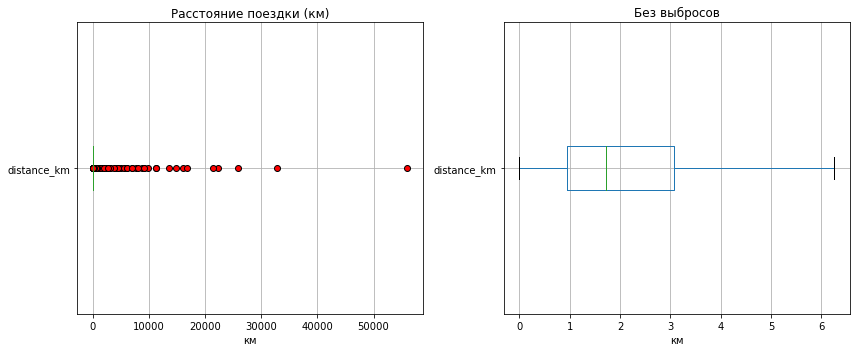

In [29]:
# ящик с усами по расстоянию поездки
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца графиков

#  расстояние поездки (с выбросами)
df.boxplot(column='distance_km', vert=False, 
           flierprops=dict(markerfacecolor='red', marker='o'), 
           ax=ax[0])
ax[0].set_title('Расстояние поездки (км)')
ax[0].set_xlabel('км')

#  расстояние поездки (без выбросов)
df.boxplot(column='distance_km', vert=False, showfliers=False, ax=ax[1])
ax[1].set_title('Без выбросов')
ax[1].set_xlabel('км')

plt.tight_layout()
plt.show()

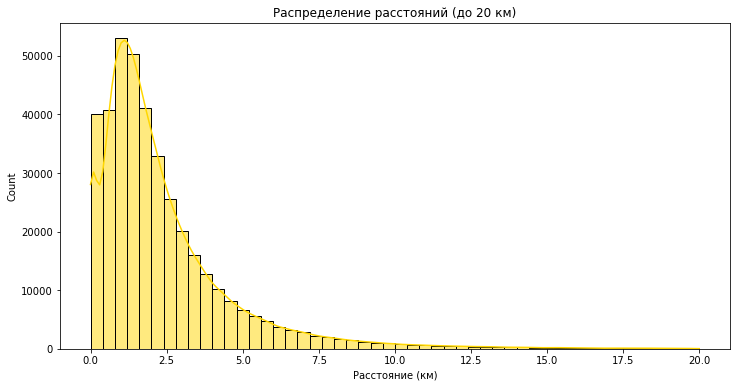

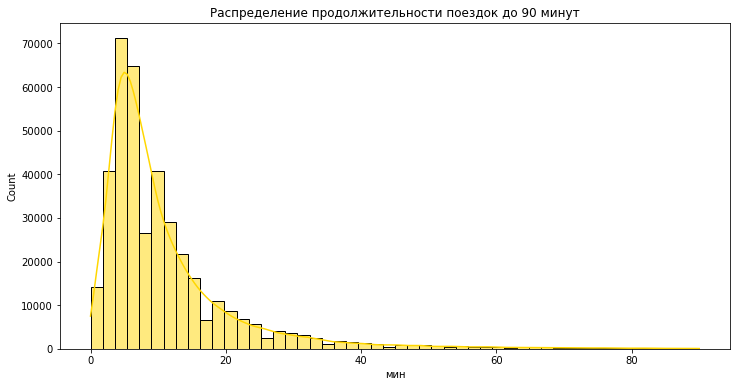

In [30]:
#фильтрация распределения расстояния и продолжительности поездок
plt.figure(figsize=(12, 6))
sns.histplot(df[df['distance_km'] <= 20]['distance_km'], bins=50, kde=True, color='gold', edgecolor='black')
plt.title('Распределение расстояний (до 20 км)')
plt.xlabel('Расстояние (км)')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df[df['duration_min'] <= 90]['duration_min'],bins=50, kde=True,color='gold',edgecolor='black')
plt.title('Распределение продолжительности поездок до 90 минут')
plt.xlabel('Стоимость минуты')
plt.xlabel('мин')
plt.show()

## 7. Лояльность и кэшбэк


count    396749.000000
mean         34.694626
std          72.987663
min        -161.940002
25%           9.800000
50%          17.090000
75%          32.980000
max        3185.000000
Name: loyalty_accrual_rub_amt, dtype: float64

count    396749.000000
mean          7.069257
std         120.327850
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55429.359375
Name: loyalty_accrual_bns_amt, dtype: float64

True     366985
False     29764
Name: has_cashback, dtype: int64

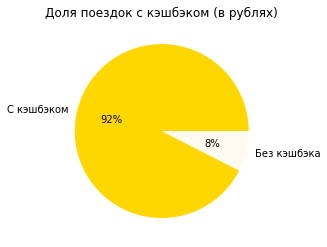

False    374801
True      21948
Name: has_cashback_bns, dtype: int64

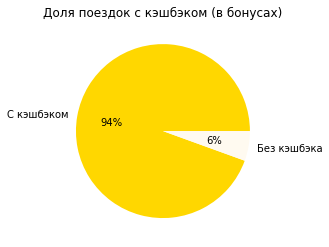

In [31]:
#loyalty_accrual_rub_amt, loyalty_accrual_bns_amt

display(df['loyalty_accrual_rub_amt'].describe())
display(df['loyalty_accrual_bns_amt'].describe())


# Сколько % поездок с кэшбэком 
df['has_cashback'] = df['loyalty_accrual_rub_amt'] > 0
cashback_counts = df['has_cashback'].value_counts()
display(cashback_counts)
# Визуализация
cashback_counts.plot(
    kind= 'pie',
    title='Доля поездок с кэшбэком (в рублях)',
    autopct= '%.0f%%',
    ylabel= '',
    colors= ['#FFD700', '#FFFAF0'],labels = ['С кэшбэком','Без кэшбэка']
)
plt.show()

# Сколько % поездок с кэшбэком в виде бонусов при оплате кредитной картой
df['has_cashback_bns'] = df['loyalty_accrual_bns_amt'] > 0
cashback_counts_bns = df['has_cashback_bns'].value_counts()
display(cashback_counts_bns)
# Визуализация
cashback_counts_bns.plot(
    kind= 'pie',
    title='Доля поездок с кэшбэком (в бонусах)',
    autopct= '%.0f%%',
    ylabel= '',
    colors= ['#FFD700', '#FFFAF0'],labels = ['С кэшбэком','Без кэшбэка']
)
plt.show()

age_group
26-30    32.555042
19-25    32.732574
31-35    34.182274
36-45    37.096272
45+      38.199165
до 18    39.640293
Name: loyalty_accrual_rub_amt, dtype: float32

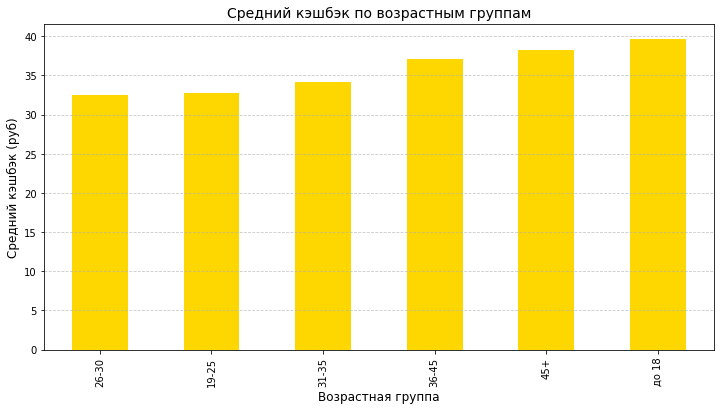

lvn_state_nm
СВЕРДЛОВСКАЯ ОБЛ      24.209332
НОВОСИБИРСКАЯ ОБЛ     28.808975
КРАСНОДАРСКИЙ КРАЙ    30.947315
Г МОСКВА              32.775372
РЕСП БАШКОРТОСТАН     32.976620
НИЖЕГОРОДСКАЯ ОБЛ     33.379387
Г САНКТ-ПЕТЕРБУРГ     33.432793
МОСКОВСКАЯ ОБЛ        34.207714
РЕСП ТАТАРСТАН        37.258282
No info               41.859806
Name: loyalty_accrual_rub_amt, dtype: float32

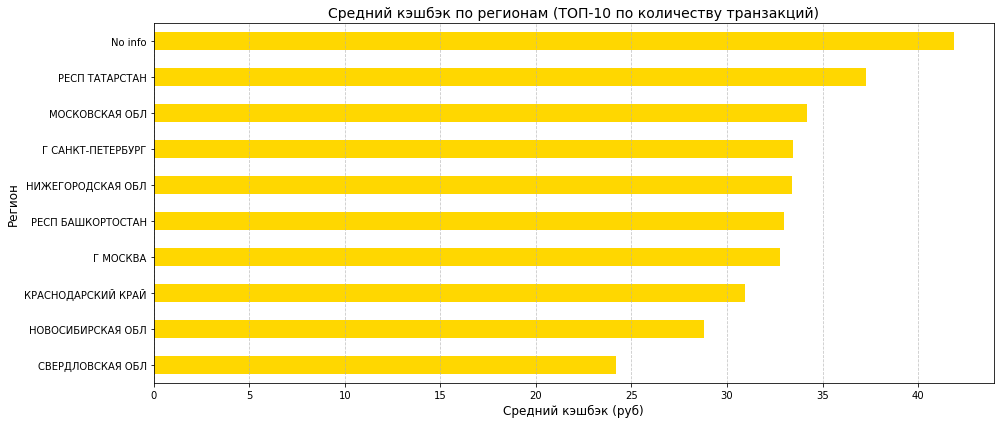

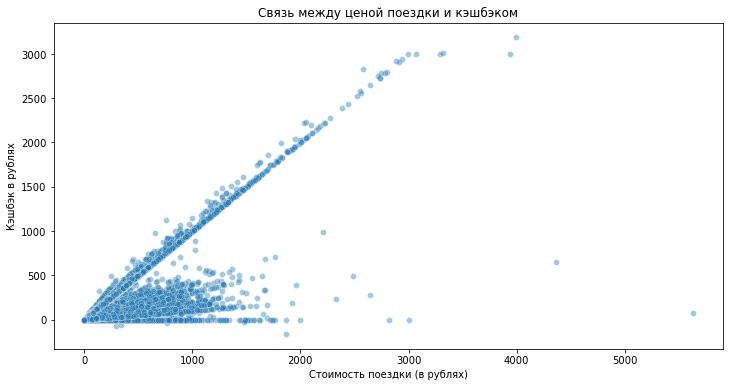

In [32]:
#Средний кэшбэк по возрастным группам
plt.figure(figsize=(12, 6))
age_group_cashback = df.groupby('age_group')['loyalty_accrual_rub_amt'].mean().sort_values()
display(age_group_cashback)
age_group_cashback.plot(kind='bar', color='gold')
plt.title('Средний кэшбэк по возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Средний кэшбэк (руб)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Средний кэшбэк по регионам (ТОП-10)
top_regions = top_10_regions['lvn_state_nm']
plt.figure(figsize=(14, 6))
region_stats = df[df['lvn_state_nm'].isin(top_regions)].groupby('lvn_state_nm')['loyalty_accrual_rub_amt'].mean().sort_values()
region_stats.plot(kind='barh', color='gold')
display(region_stats)
plt.title('Средний кэшбэк по регионам (ТОП-10 по количеству транзакций)', fontsize=14)
plt.xlabel('Средний кэшбэк (руб)', fontsize=12)
plt.ylabel('Регион', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Связь между кэшбэком и ценой поездки
plt.figure(figsize=(12, 6))
sns.scatterplot(x='nominal_price_rub_amt', y='loyalty_accrual_rub_amt', data=df, alpha=0.4)
plt.title('Связь между ценой поездки и кэшбэком')
plt.xlabel('Стоимость поездки (в рублях)')
plt.ylabel('Кэшбэк в рублях')
plt.show()



## 8. Гипотезы

## Гипотезы, на которые можно обратить внимание и проверить статистическую значимость


**Гипотеза 1:Снижение стоимости активации самоката от МТС Юрент
внутри приложения Т-Банка в утренние и вечерние часы приведет к росту
числа поездок на 10–15%.**

Обоснование: пиковые часы соответствуют времени, когда люди едут на работу и обратно. Устранение барьера в виде фиксированной оплаты увеличит конверсию в поездку.

**Гипотеза 2:Продление бесплатного времени ожидания перед стартом
(до 2 мин) внутри приложения Т-Банка уменьшит количество
коротких/отменённых поездок.**
часть пользователей активирует самокат случайно или передумывает, из-за чего фиксируется короткая поездка (0–1 мин) без движения.

Обоснование на основе EDA:
1. Есть поездки с очень короткой длительностью
В анализе продолжительности видно, что есть значительная доля поездок с длительностью 0–1 мин.
2. Причины таких поездок могут быть:
- Пользователь случайно активировал самокат (например, отсканировал, но не поехал).
- Нашел неисправный самокат.
- Передумал, но уже списалась сумма за активацию или минимальное время.
3. Краткие незавершенные поездки → низкая лояльность.
- Люди не понимают, за что заплатили.
- Особенно критично для новых клиентов — это ухудшает первое впечатление.

Вывод:
Если дать пользователю 2 минуты бесплатного старта, он сможет:
- убедиться, что самокат работает,
- успеть отказаться без списания.
- Это повысит доверие, снизит количество коротких поездок без движения, и улучшит удержание.
## Выбор самой перспективной гипотезы

**Выбранная гипотеза: Гипотеза 1 — снижение стоимости активации в часы пик.**

- Пояснение:
- Простая в реализации — меняется только логика тарифа по времени.
- Потенциально влияет на новых пользователей, которые пробуют сервис.

Гипотеза 1:
Снижение стоимости активации в пиковые часы (утро и вечер) повысит общее количество поездок.

Обоснование на основе EDA:
1. Фиксированная стоимость активации в час пик— 50 руб.
По графику "Частота поездок при разной стоимости активации" видно, что 65,5% поездок совершаются со стоимостью активации - 50.
Это значительная сумма при короткой поездке:
- Например:если поездка длится 5 минут при 7 руб/мин = 35 руб + 50 руб активация = 85 руб. И мы получаем, что 59% стоимости этой поездки— только за активацию.
2. Пиковая активность — короткие поездки

В EDA видно, что утром и вечером (5–10 и 16–19) наблюдается пик поездок (график "Поездки по времени суток").
- В целом глядя на график распределения продолжительности поездок, большинство из них –короткие(менее 11 мин.)

3. Повышенный барьер входа

Для новых/редких пользователей фиксированная активация может быть барьером.
Пользователи быстрее отменяют или отказываются от короткой поездки из-за психологического эффекта: “невыгодно платить за активацию, если еду 5 минут”.

Вывод:

Снижение стоимости активации в пиковые часы (до 30 руб. как в обычное время при
небольшом спросе) внутри приложения Т-Банка уменьшит барьер и повысит число завершённых
коротких поездок. В свою очередь, это напрямую влияет на увеличение использования сервиса
«Самокаты» Т-банка

- Для этого можно провести A/B-тест: одной группе выдать скидку на активацию в час пик
- Затем Сравнить:
- Количество поездок,
- Среднюю длительность,
- Конверсию активаций в завершенные поездки.
- И подтвердить результаты А/В теста статистическим тестом







## 9. Оценка доли Т-банка в индустрии

In [33]:
# Количество поездок в датасете Т-Банка 
tbank_trips = df.shape[0]  

#  оценка общего числа поездок в индустрии кикшеринга за сезон в 2024 году
industry_total_trips = 211700000

# Расчёт доли поездок через Т-банк от общего числа поездок
tbank_share = tbank_trips / industry_total_trips * 100

# Вывод
print(f'Доля Т-Банка в индустрии kicksharing: {tbank_share:.2f}%')

# Дополнительно можно рассмотреть долю поездок через приложение Т-банка от общего числа поездок Юрента
urent_mts_trips_count= 100300000

tbank_share_urent= tbank_trips / urent_mts_trips_count * 100
# Вывод
print(f'Доля Т-Банка в индустрии kicksharing от общего числа поездок МТС Юрент: {tbank_share_urent:.2f}%')

Доля Т-Банка в индустрии kicksharing: 0.19%
Доля Т-Банка в индустрии kicksharing от общего числа поездок МТС Юрент: 0.40%


Для оценки доли Т-банка в индустрии кикшеринга было сравнены количество поездок в датасете Т-Банка (396 749 поездок) с общим числом поездок в kicksharing-индустрии России за  сезон в 2024 году. [31,2 млрд рублей и 211,7 млн поездок за сезон. Кикшеринг в России 2024](https://truesharing.ru/tp/54173/?ysclid=mallgqem5s466820996)
Если взять за основу открытые данные рынка (211,7 млн поездок в сезон 2024 по данным «Юрент», «ВУШ», Whoosh и др.), то получаем долю рынка Т-банка около 0,2%
А сравнивая с общим числом поездок сервиса МТС "Юрент", с которым сотрудничает Т-банк, доля Т-Банка в индустрии kicksharing от общего числа поездок МТС Юрент составляет 0,40%.

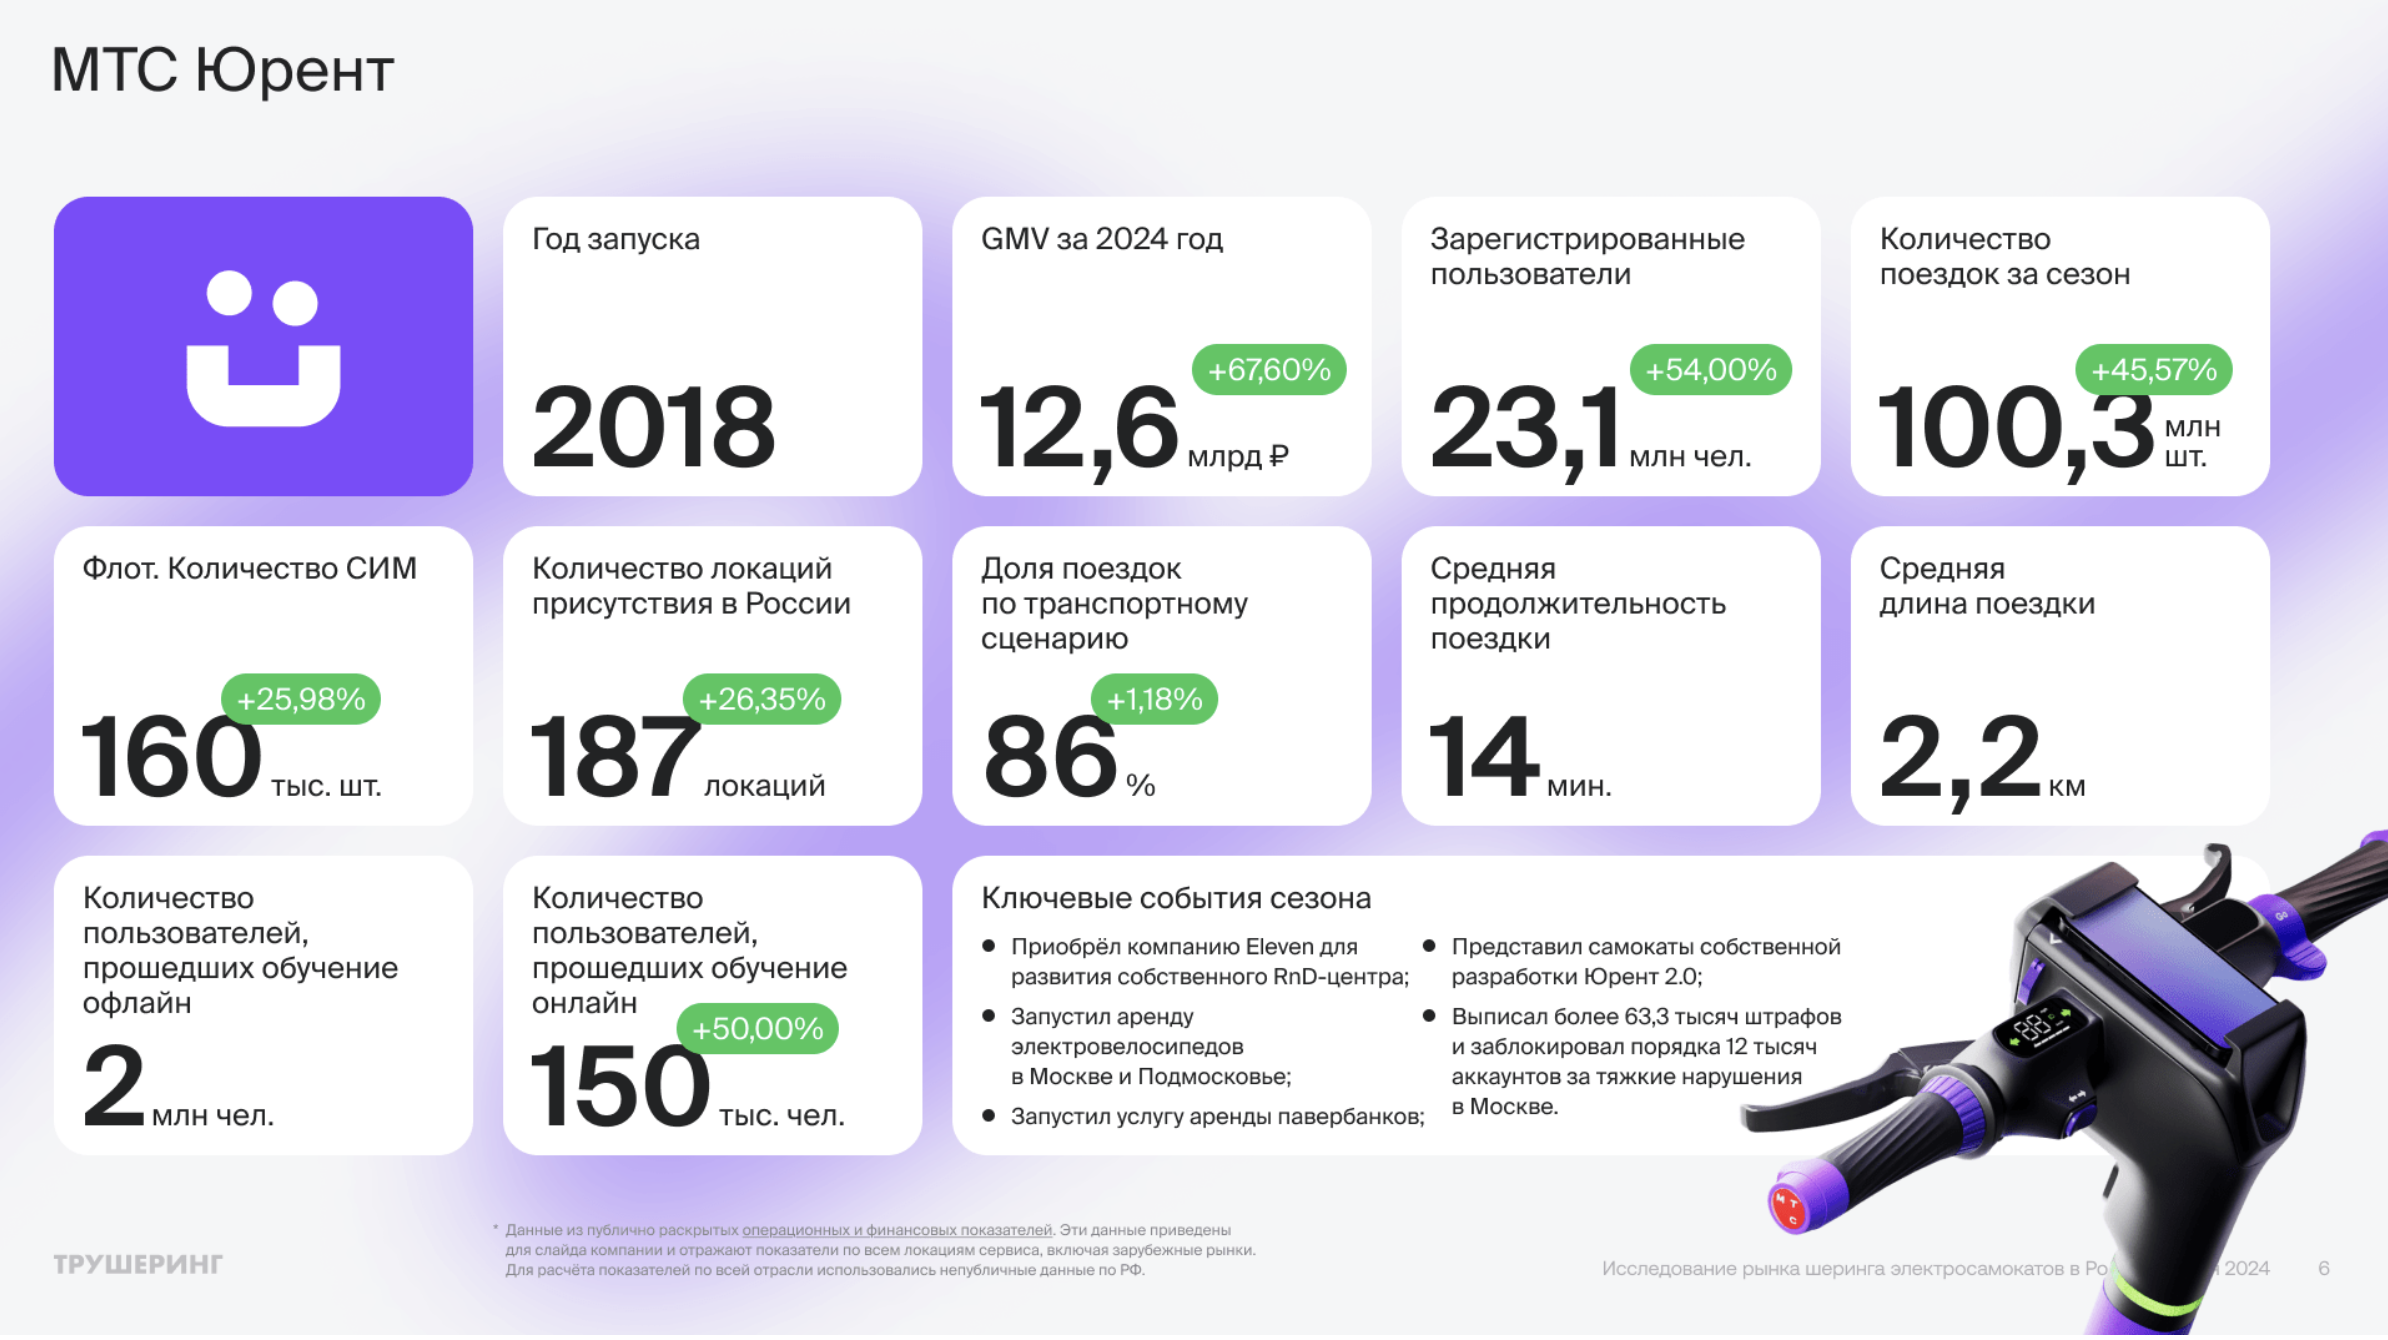

## Аналитическая записка

1. Структура данных

Всего в датасете: 396 749 строк (поездок).
Поля включают характеристики пользователя, самоката, даты, стоимость, продолжительность, лояльность и тд.

2. Демография пользователей

- Пол
Мужчины — 80%, женщины — 19%, “No info” — 1%.
Вывод: сервис преимущественно используется мужчинами

- Возраст
Основные возрастные группы: 19-25 и 35-45 лет.
Средний возраст: 31 год.
Вывод: сервис востребован у молодежи и молодых профессионалов.
- Образование
53% не указали образование.
Среди указавших: GRD (высшее) и SCH (среднее).
Вывод: возможно, неполный сбор профиля в банке.
- Регион
ТОП-5 регионов по числу пользователей:
Москва — 18%
МО — 9%
СПб — 9%
Свердловская обл. — 5%
Краснодарский край — 3%

Вывод: сервис активно используется в крупных городах.

3. Стоимость поездок

- Minute_cost
Гистограмма распределения и ящик с усами стоимости минуты показывают распределение:
Основной диапазон: 6.5–8.5 руб.
Медиана: 7.3 руб.
Максимум: 20 руб., минимум: 1.5 руб.

**Есть выбросы(чрезмерно маленькая стоимость)**

- Activation_cost
65,5% поездок с активацией 50 руб.,остальные: 0–45, при этом 22% приходится на стоиомсть активации в 30 рублей.
Средняя активация выше в пиковые часы, а в непиковое время иногда опускается до 30 руб.
(см. график: "Средняя стоимость активации по часу дня")
- Hold_amount
300 руб. замораживаются почти всегда (396 718 раз из 396 749), 30 записей — по 80 руб.
Вывод: структура тарификации стабильна. Активация = основной фиксированный платёж.

4. Модели самокатов

Модель SL — 61% всех поездок, также популярны Max, E, Urban e-bike.
SL — самые короткие и дешевые поездки.
B1D — редкая модель, но с максимальной средней продолжительностью (17.9 мин).
Вывод: модель SL — массовая, но с минимальными характеристиками; другие модели — дороже и "дальше" ездят.

5. Временные характеристики

- По часам суток
График: "Средняя стоимость минуты по часам суток"
Пики: 5–10 и 15–19 часов
Эти же часы — пик количества поездок.
- По дням недели
Наивысшая активность: будние дни, особенно среда, четверг и пятница.
- По месяцам
Максимум поездок — июль и август и сентябрь.
Минимум — апрель (начало сезона).
Вывод: поведение пользователей подчинено сезонности.

6. Продолжительность и расстояние
- Типичное распределение расстояний поездок лежит в диапазоне до 20 км: самая высокая плотность наблюдается на диапазоне от 0 до 3 км
- Типичное распределение продолжительности поездок лежит в диапазоне до 60 мин: самая высокая плотность наблюдается на диапазоне от 0 до 20 мин.
- Есть тысячи поездок с duration < 2 мин и distance = 0.

Вывод: часть поездок формально фиксируются, но по факту не происходят (возможны ошибочные активации).

7. Кэшбэк и лояльность

- В рублях (loyalty_accrual_rub_amt) 92% поездок включают кэшбэк.
- Средний размер — 34.7 руб.
- Больше кэшбэк у пользователей до 18 -39.64руб и в городах: РЕСП ТАТАРСТАН,МО, СПБ и Нижегородская область
- В бонусах (loyalty_accrual_bns_amt)
- 94% поездок имеют кэшбэк в бонусах (по картам), а их Средний размер —7 руб.

- Корреляция с ценой поездки
Чем выше стоимость — тем больше кэшбэк (см. scatterplot).
Вывод: система кэшбэка активно работает, но может неравномерно влиять на мотивацию — зависит от региона, возраста, способа оплаты

8. Гипотезы
Гипотезы, на которые можно обратить внимание и проверить статистическую значимость

- Гипотеза 1:Снижение стоимости активации самоката от МТС Юрент внутри приложения Т-Банка в утренние и вечерние часы приведет к росту числа поездок на 10–15%.
- Гипотеза 2:Продление бесплатного времени ожидания перед стартом (до 2 мин) внутри приложения Т-Банка уменьшит количество коротких/отменённых поездок.


9. Доля Т-Банка в индустрии

Для оценки доли Т-банка в индустрии кикшеринга было сравнены количество поездок в датасете Т-Банка (396 749 поездок) с общим числом поездок в kicksharing-индустрии России за  сезон в 2024 году. [31,2 млрд рублей и 211,7 млн поездок за сезон. Кикшеринг в России 2024](https://truesharing.ru/tp/54173/?ysclid=mallgqem5s466820996)
Если взять за основу открытые данные рынка (211,7 млн поездок в сезон 2024 по данным «Юрент», «ВУШ», Whoosh и др.), то получаем долю рынка Т-банка около 0,2%
А сравнивая с общим числом поездок сервиса МТС "Юрент", с которым сотрудничает Т-банк, доля Т-Банка Внутри партнёра (Юрент) составляет 0,40%.

**Вывод:**
Это даёт базу для роста и продвижения продукта.
